In [15]:
### 필요한 패키지 불러오기
import pandas as pd
import numpy as np
import konlpy
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [17]:
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] =False

In [2]:
df = pd.read_csv("news_comment_BTS.csv", encoding="UTF-8")
df

,reg_time,reply,press,title,url
0,2020-09-01 22:58:09,국보소년단<U+0001F49C>,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
1,2020-09-01 09:56:46,아줌마가 들어도 좋더라,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
2,2020-09-01 09:08:06,팩트체크\n\n현재 빌보드 HOT 100\n\n1위 방탄소년단[BTS]\n2위 C...,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
3,2020-09-01 08:52:32,방탄소년단이 한국사람이라 너무 자랑스러워요 ㅠㅠ 우리오래오래 함께하자!,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
4,2020-09-01 08:36:33,"대단한 BTS, 월드 클래스는 다르네^^ 좋은 소식!! 응원해요",한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
...,...,...,...,...,...
1195,2020-09-01 06:45:44,역시!!!!!!!!!!!!,KBS,BTS ‘다이너마이트’ 빌보드 핫100 1위 등극…한국 뮤지션 최초,https://news.naver.com/main/read.nhn?mode=LSD&...
1196,2020-09-01 06:45:05,우리 탄이들 너무 자랑스럽고\n사랑해<U+0001F49C><U+0001F49C><U...,KBS,BTS ‘다이너마이트’ 빌보드 핫100 1위 등극…한국 뮤지션 최초,https://news.naver.com/main/read.nhn?mode=LSD&...
1197,2020-09-01 06:40:15,이런애들 꼭 군대를 보내 는게 맞을까요,KBS,BTS ‘다이너마이트’ 빌보드 핫100 1위 등극…한국 뮤지션 최초,https://news.naver.com/main/read.nhn?mode=LSD&...
1198,2020-09-01 06:38:56,군면제급이다 이건,KBS,BTS ‘다이너마이트’ 빌보드 핫100 1위 등극…한국 뮤지션 최초,https://news.naver.com/main/read.nhn?mode=LSD&...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reg_time  1200 non-null   object
 1   reply     1200 non-null   object
 2   press     1200 non-null   object
 3   title     1200 non-null   object
 4   url       1200 non-null   object
dtypes: object(5)
memory usage: 47.0+ KB


In [4]:
df["reply"] = df["reply"].str.replace("[^가-힣]", " ", regex=True)
df["reply"].head()

0                                    국보소년단            
1                                         아줌마가 들어도 좋더라
2    팩트체크  현재 빌보드           위  방탄소년단       위       ...
3              방탄소년단이 한국사람이라 너무 자랑스러워요    우리오래오래 함께하자 
4                  대단한      월드 클래스는 다르네   좋은 소식   응원해요
Name: reply, dtype: object

In [5]:
kkma = konlpy.tag.Kkma()

In [6]:
nouns = df["reply"].apply(kkma.nouns)
nouns

0                                        [국보, 국보소년단, 소년단]
1                                                   [아줌마]
2                   [팩트, 팩트체크, 체크, 보드, 위, 방탄, 방탄소년단, 소년단]
3              [방탄, 방탄소년단, 소년단, 한국, 한국사람, 사람, 자랑, 우리, 하자]
4                                       [월드, 클래스, 소식, 응원]
                              ...                        
1195                                                   []
1196                                      [우리, 탄, 자랑, 사랑]
1197                                              [애, 군대]
1198                                     [군, 군면제급, 면제, 급]
1199    [자랑, 축하, 김, 김남, 남, 김석진, 민, 민윤기, 윤기, 정, 정호석, 호석...
Name: reply, Length: 1200, dtype: object

In [7]:
### 한 행에 한 단어만 들어가도록 수정
nouns = nouns.explode()
nouns

0          국보
0       국보소년단
0         소년단
1         아줌마
2          팩트
        ...  
1199      박지민
1199      김태형
1199        전
1199      전정국
1199       정국
Name: reply, Length: 9353, dtype: object

In [8]:
df_word = pd.DataFrame({"word" : nouns})
df_word["count"] = df_word["word"].str.len()

df_word = df_word.query("count >= 2")
df_word

,word,count
0,국보,2.0
0,국보소년단,5.0
0,소년단,3.0
1,아줌마,3.0
2,팩트,2.0
...,...,...
1199,박지,2.0
1199,박지민,3.0
1199,김태형,3.0
1199,전정국,3.0


In [9]:
df_word = df_word.groupby("word", as_index=False) \
                 .agg(n=("word", "count")) \
                 .sort_values("n", ascending=False)
                 
df_word

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
...,...,...
1136,실력있음,1
406,다음주면,1
1134,신화,1
1133,신중,1


In [10]:
top20 = df_word.head(20)
top20

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
813,보드,131
618,면제,125
233,군면제,78
225,군대,77
1364,우리,68


<Axes: xlabel='n', ylabel='word'>

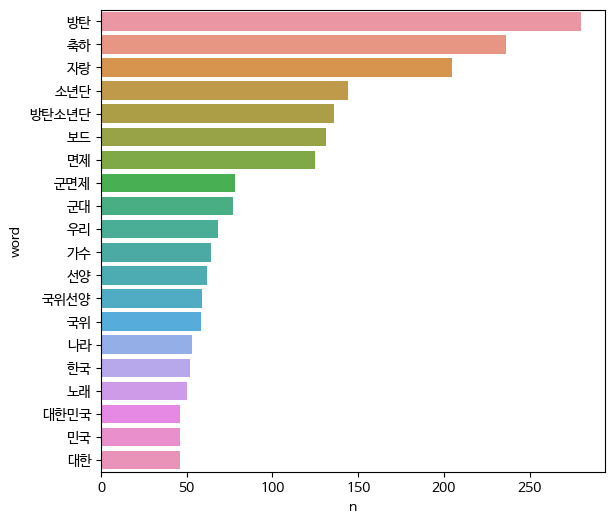

In [18]:
plt.figure(figsize=(6.5, 6))
sns.barplot(data=top20, y="word", x="n")

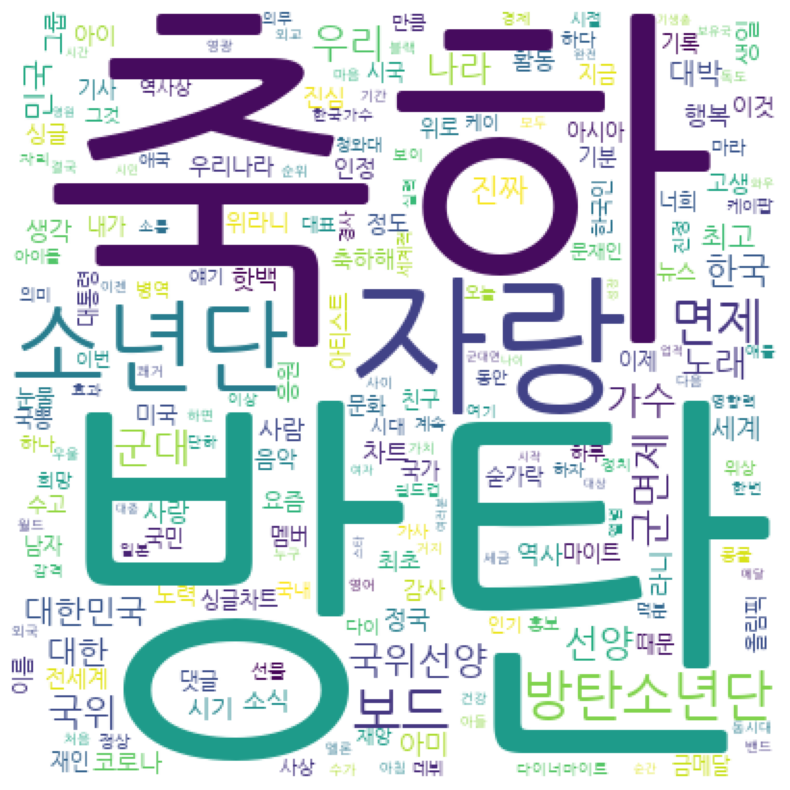

In [19]:
dic_word = df_word.set_index("word").to_dict()["n"]

wc = WordCloud(random_state=42, 
               font_path = "NanumGothic-Regular.ttf", 
               width=400, 
               height=400, 
               background_color="white")

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(img_wordcloud)